In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

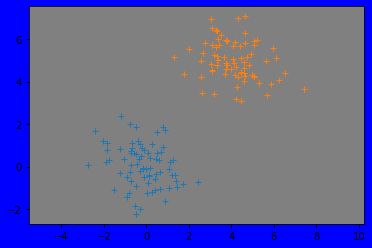

In [ ]:
mp1 = (0,0)
mp2 = (4,5)
varj1 = [[1, 0], [0, 1]]
varj2 = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mp1, varj1, 75).T
x2, y2 = np.random.multivariate_normal(mp2, varj2, 75).T

plt.figure(facecolor='blue')
ax = plt.axes()
ax.set_facecolor('grey')
plt.plot(x1, y1, '+')
plt.plot(x2, y2, '+')
plt.axis('equal')

plt.show()

In [ ]:
dx = []

for i in range(len(x1)):
        dx.append([x1[i], y1[i], -1])
for i in range(len(x2)):
        dx.append([x2[i], y2[i], 1])

In [ ]:
dx = np.array(dx)
np.random.shuffle(dx)

In [ ]:
tr_dx = []
test_dx = []

for i in range(100):
    tr_dx.append(dx[i])
for j in range(100, len(dx)):
    test_dx.append(dx[j])

train_dx = np.array(tr_dx)
test_dx = np.array(test_dx)

In [13]:
def Gradient_Dsc_funct(x, y, alpha, ep):
    
    m = np.shape(x)[0] 
    n = np.shape(x)[1] 
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    w = 2*np.random.rand(n+1,)-1
    loss_record = []
    
    for current_iteration in range(ep):
        Y_guess = w.dot(x.T)
        err = Y_guess - y
        ct = np.sum(err ** 2)
        Gdnt = (1 / m) * x.T.dot(err)
        w = w - alpha * Gdnt
        loss_record.append(ct)
    return loss_record, w

<function matplotlib.pyplot.show(*args, **kw)>

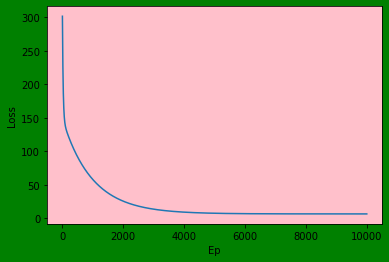

In [15]:
loss, w = Gradient_Dsc_funct(train_dx[:,:-1],train_dx[:,-1], 0.001, 10000)

plt.figure(facecolor='green')
ax = plt.axes()
ax.set_facecolor("pink")
plt.plot(np.arange(len(loss)), loss)
plt.xlabel('Ep')
plt.ylabel('Loss')
plt.show

In [16]:
print(loss)
print(w)

[301.4905922978668, 294.9535414397545, 288.6841518283018, 282.67122135742966, 276.90401702913607, 271.3722553084033, 266.0660833007909, 260.97606071826834, 256.0931426002721, 251.40866275836484, 246.9143179141914, 242.60215250169855, 238.46454410580117, 234.49418951084152, 230.68409133330553, 227.02754521432786, 223.5181275485446, 220.14968372683077, 216.9163168714046, 213.8123770426773, 210.83245089809444, 207.97135178403934, 205.22411024266424, 202.58596491627137, 200.05235383259762, 197.61890605504902, 195.28143368260447, 193.03592418474264, 190.87853305736502, 188.80557678626963, 186.8135261052985, 184.89899953681706, 183.05875720270234, 181.28969489451245, 179.58883839198253, 177.95333801944867, 176.38046343023518, 174.86759860945915, 173.41223708610593, 172.01197734561018, 170.66451843454792, 169.36765574939284, 168.11927700162946, 166.91735835183727, 165.75996070567044, 164.64522616495248, 163.57137462739084, 162.53670052868662, 161.53956972107756, 160.5784164825992, 159.6517406

In [17]:
x = test_dx[:,:-1]
y = test_dx[:,-1]

x = np.concatenate((np.ones((50,1)),x), axis=1)
y_pred = np.dot(x,w.T)

In [18]:
err = y_pred - y
ct = np.sum(err ** 2)
print(err)

[ 0.52753692 -0.17915472  0.52907699  0.23814648  0.11196455 -0.14070126
  0.26457602 -0.20284805 -0.53171966  0.11767898  0.04637245 -0.02213875
  0.19545976  0.12850487  0.25265302 -0.25885346  0.01155951  0.2331193
  0.3577291  -0.30324555 -0.17300155  0.12012091  0.15981085 -0.20789688
  0.10575846 -0.0821921  -0.21757328  0.4079031  -0.5157431  -0.18947459
 -0.06425278 -0.40925705 -0.32502315 -0.18151886 -0.14138597 -0.28020217
  0.0511766   0.4502162  -0.07341015  0.25538248  0.16331566  0.22841308
  0.06787201  0.07548914 -0.12872015 -0.37168215 -0.22712927 -0.23561629
  0.11346395  0.41516301]


In [19]:
err = []
for i in range(len(y_pred)):
    err.append(1 if ((y[i]==-1 and y_pred[i]>0) or (y[i]==1 and y_pred[i]<0)) else 0)

err = np.array(err)
ct = np.sum(err)
print(ct)

0


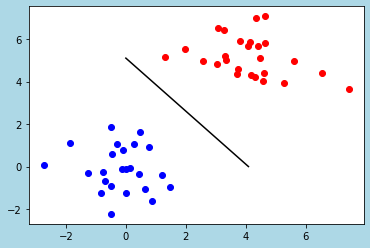

In [22]:
plt.figure(facecolor='lightblue')
ax = plt.axes()
ax.set_facecolor('white')
for i in range(len(test_dx)):
    if test_dx[i,2] == 1:
        plt.plot(test_dx[i,0], test_dx[i,1], 'ro')
    else:
        plt.plot(test_dx[i,0], test_dx[i,1], 'bo')
plt.plot([-w[0]/w[2], 0], [0, -w[0]/w[1]], 'k-')
plt.show()